# Load the data frame

In [4]:
import pandas as pd 
import matplotlib




In [5]:
df=pd.read_csv("data/TG_STAID000001.txt",sep=',',skiprows=20,parse_dates=["    DATE"])

In [9]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# show certyain rows


In [28]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# to show certain columns

In [26]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [27]:
df[' Q_TG']

0        0
1        0
2        0
3        0
4        0
        ..
59316    9
59317    9
59318    9
59319    9
59320    9
Name:  Q_TG, Length: 59321, dtype: int64

In [29]:
df[['    DATE', '   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Simple statistics and filtering

In [41]:
dff=df.loc[df['   TG'] != -9999]['   TG']  
dff
# THIS FILTERS OUT TG VALUES WITH -9999

0        21
1        46
2        31
3        37
4        31
         ..
53655    80
53656    70
53657    71
53658    63
53659    84
Name:    TG, Length: 53103, dtype: int64

In [43]:
dff.mean()/10 
# WE DIVIDE BY 10 BECAUSE THE DATA ARE ORIGINALLY MULTIPLIED BY 10

6.360787526128467

In [44]:
dff.max()/10

26.2

In [46]:
dff.min()/10


-28.8

In [45]:
dff.min()

-288

<AxesSubplot:>

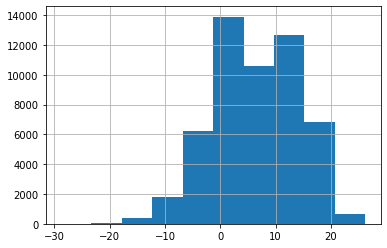

In [55]:
(dff/10).hist()

# GET CERTAIN CELLS

In [64]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [62]:
df.loc[df['    DATE']=="1860-01-05"]['   TG'].squeeze()/10 
# To get the actual value

3.1

In [69]:
df.loc[df['   TG']==df['   TG'].max()]['    DATE'].squeeze()
# To get the date where TG is maximum
# loc method is a query, You can queryt by condition or by coordinates
# This is query by condition

Timestamp('1868-08-16 00:00:00')

In [71]:
df.loc[3,'   TG'] 
# This is query by coordinates
# Row=3, column='   TG'

37

# Calculate a new column out of existing column

In [22]:
df['TG0']=df['   TG'].mask(df['   TG']==-9999) /10  
# Mask method means without -9999
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [25]:
df['Fanrenheit']=df['TG0'] * (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,Fanrenheit
0,1,35381,1860-01-01,21,0,2.1,35.78
1,1,35381,1860-01-02,46,0,4.6,40.28
2,1,35381,1860-01-03,31,0,3.1,37.58
3,1,35381,1860-01-04,37,0,3.7,38.66
4,1,35381,1860-01-05,31,0,3.1,37.58
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


# Plotting

<AxesSubplot:>

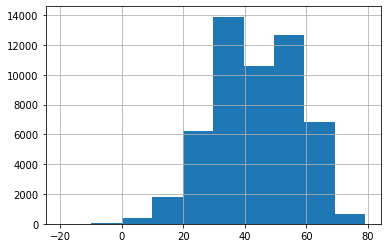

In [27]:
df['Fanrenheit'].hist()

<AxesSubplot:xlabel='    DATE'>

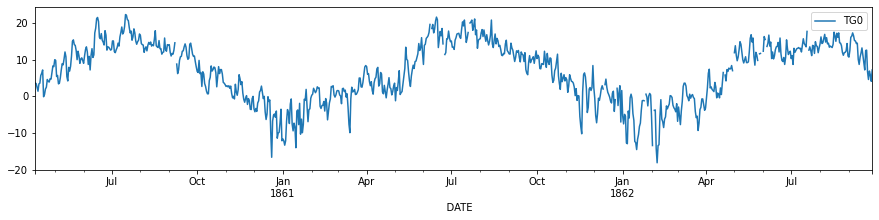

In [30]:
df[100:1000].plot(x='    DATE',y='TG0',figsize=(15,3))